<a href="https://colab.research.google.com/github/olavodd42/YOLOV3-web/blob/main/yolov3_treino1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get upgrade
!apt-get install -y build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-d
!apt-get install -y libopencv-dev
!apt-get install -y g++-5
!apt-get install -y gcc-5

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,910 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,391 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restr

In [ ]:
!/usr/local/cuda/bin/nvcc --version
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if not '/device:GPU:0' in device_name:
    print('\nERROR: GPU is not selected as hardware accelerator!')
else:
    print(device_name)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
/device:GPU:0


In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 22.11 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.
/content/darknet
3rdparty	DarknetConfig.cmake.in	Dockerfile.cpu	       LICENSE	      scripts
build		darknet_images.py	Dockerfile.gpu	       Makefile       src
build.ps1	darknet.py		image_yolov3.sh        net_cam_v3.sh  vcpkg.json
cfg		darknet_video.py	image_yolov4.sh        net_cam_v4.sh  vcpkg.json.opencv23
cmake		data			include		       package.xml    video_yolov3.sh
CMakeLists.txt	docker-compose.yml	json_mjpeg_streams.sh  README.md      video_yolov4.sh
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cfla

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#%pip install roboflow
#!pip install roboflow

!curl -L "https://public.roboflow.com/ds/1buzHjBbxM?key=MnCc56NLyL" > /content/gdrive/MyDrive/roboflow.zip; unzip -d /content/gdrive/MyDrive/roboflow /content/gdrive/MyDrive/roboflow.zip; rm /content/gdrive/MyDrive/roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   898  100   898    0     0   3907      0 --:--:-- --:--:-- --:--:--  3921
100  210M  100  210M    0     0  56.3M      0  0:00:03  0:00:03 --:--:-- 67.0M
Archive:  /content/gdrive/MyDrive/roboflow.zip
 extracting: /content/gdrive/MyDrive/roboflow/README.dataset.txt  
 extracting: /content/gdrive/MyDrive/roboflow/README.roboflow.txt  
   creating: /content/gdrive/MyDrive/roboflow/test/
 extracting: /content/gdrive/MyDrive/roboflow/test/_annotations.txt  
 extracting: /content/gdrive/MyDrive/roboflow/test/_classes.txt  
 extracting: /content/gdrive/MyDrive/roboflow/test/addons_mozilla_org_png.rf.8pWFwr9ZblJ92BQghXBW.jpg  
 extracting: /content/gdrive/MyDrive/roboflow/test/addons_mozilla_org_png.rf.ec9a8e78cd5c0e6ab255f50c408caecf.jpg  
 extracting: /content/gdrive/MyDrive/roboflow/test/adf_ly_png.rf.490b629d732bbf70e8e1d3720f440

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  #  redimensiona a imagem para ter 3 vezes o tamanho original
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation =
 cv2.INTER_CUBIC)

  # Exibe a imagem
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!pip install clodsa

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.2/276.2 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
%pip install albumentations
%pip install opencv-python-headless
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np

img = cv2.imread("/content/gdrive/MyDrive/roboflow/train/4shared_com_png.rf.56ESfdbTeqhYqGJTPaY7.jpg")

In [ ]:
transform = A.Compose([
    A.RandomSizedBBoxSafeCrop(width=416, height=416, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.5),
    ToTensorV2()
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

In [ ]:
def load_image_and_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    return image, boxes

def augment_image_and_boxes(transform, image, boxes, labels):
    augmented = transform(image=image, bboxes=boxes, class_labels=labels)
    return augmented['image'], augmented['bboxes'], augmented['class_labels']

In [ ]:
%pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader


# Defina a transformação usando Albumentations
transform = A.Compose([
    A.RandomSizedBBoxSafeCrop(width=416, height=416, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.5),
    ToTensorV2()
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

class YOLODataset(Dataset):
    def __init__(self, annotations, image_dir, transform=None):
        self.annotations = annotations
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        image_file, boxes, labels = self.annotations[idx]
        image_path = os.path.join(self.image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converte para RGB (matplotlib espera RGB)

        if self.transform:
            augmented = self.transform(image=image, bboxes=boxes, class_labels=labels)
            image = augmented['image']
            boxes = augmented['bboxes']
            labels = augmented['class_labels']

        return image, boxes, labels

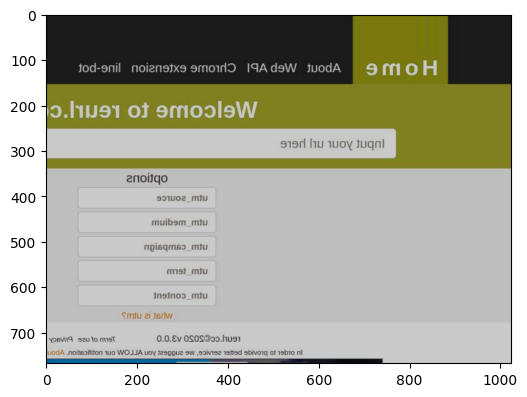

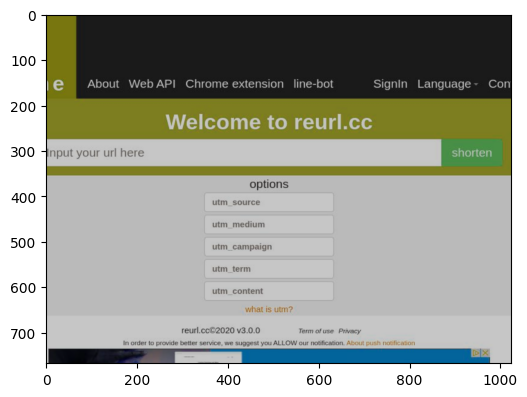

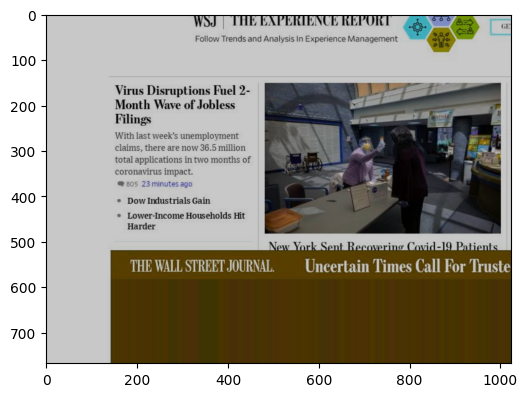

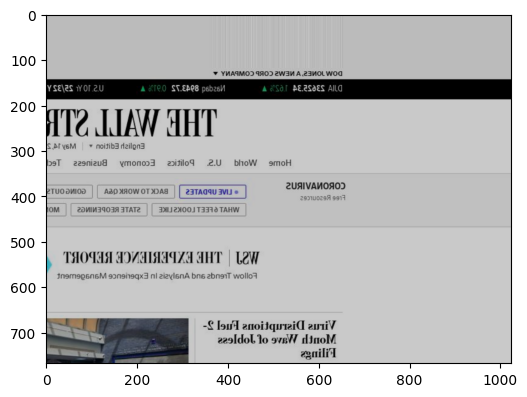

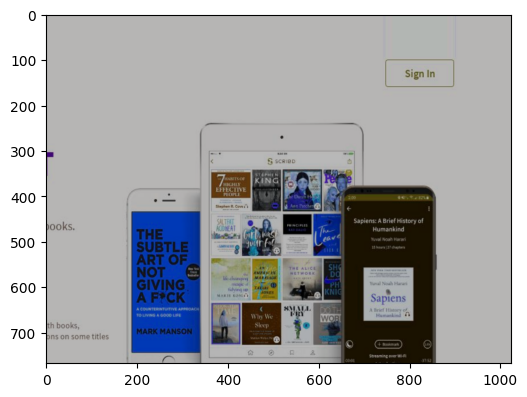

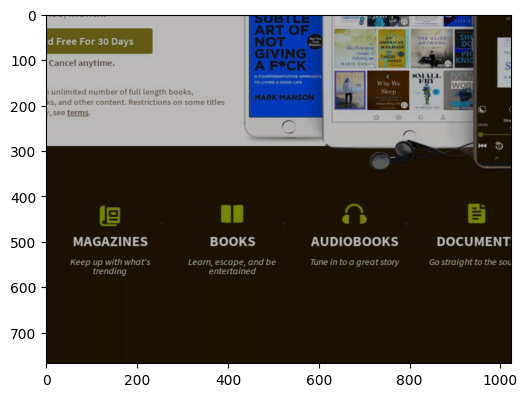

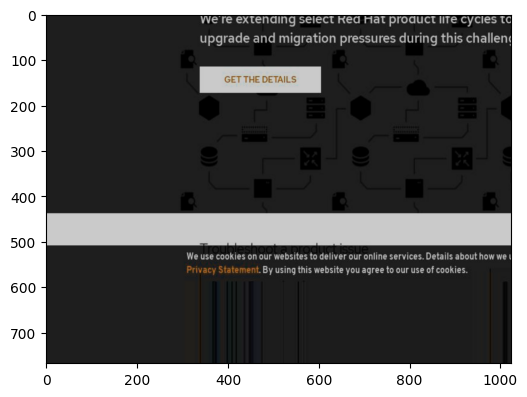

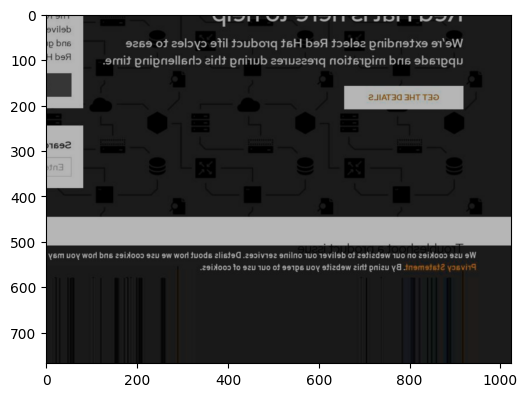

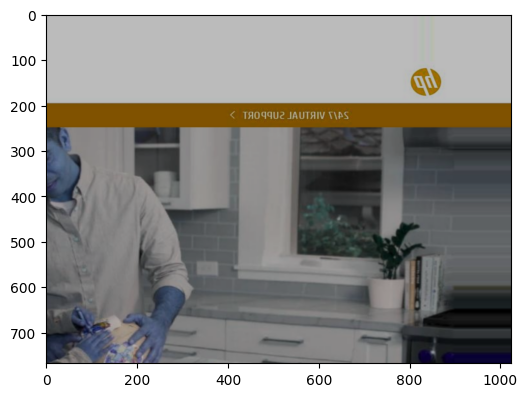

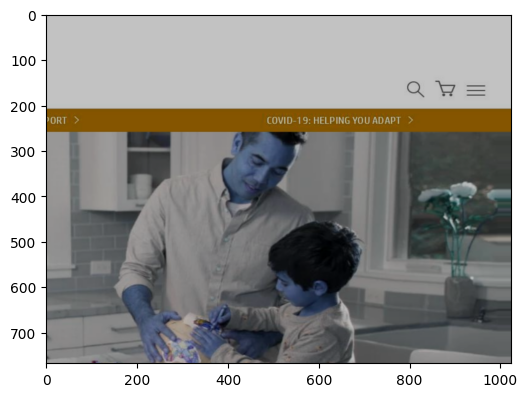

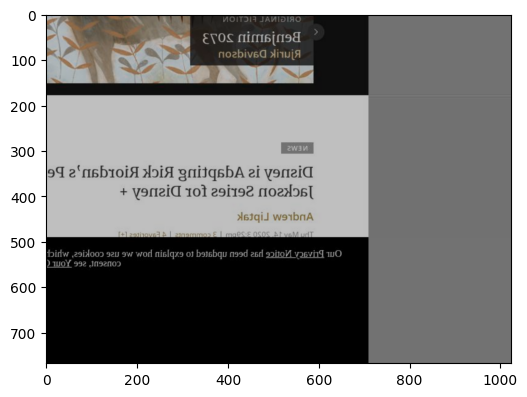

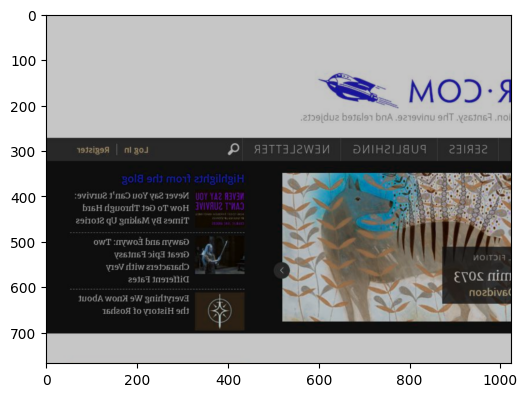

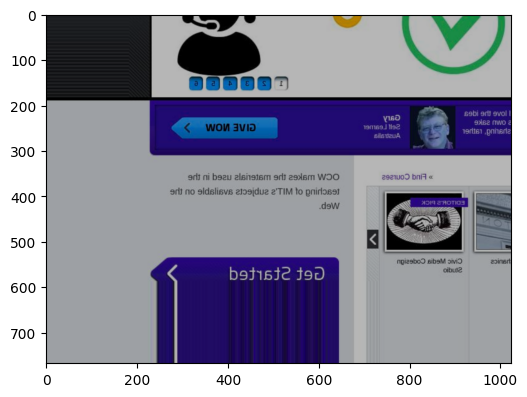

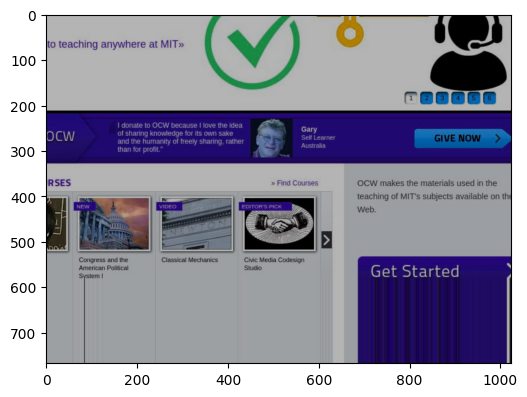

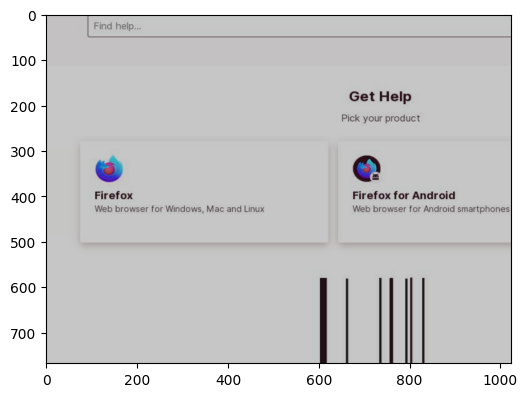

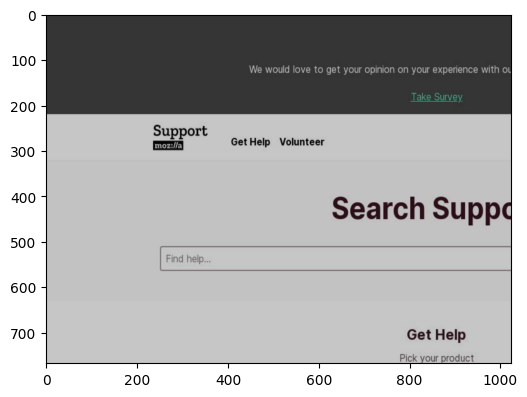

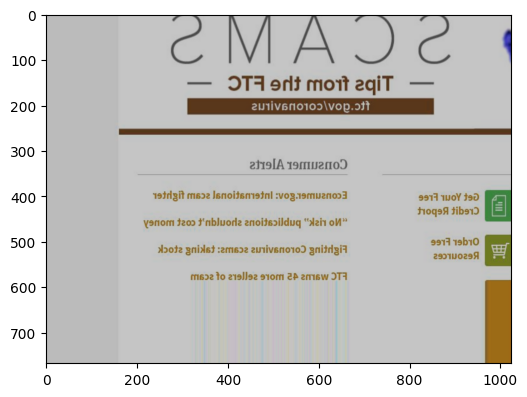

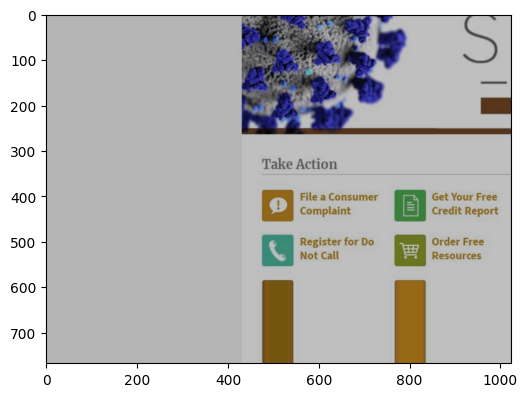

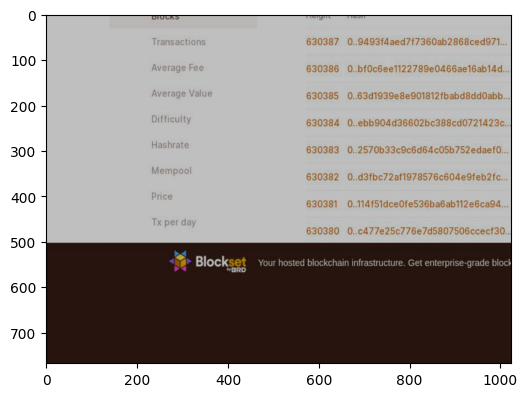

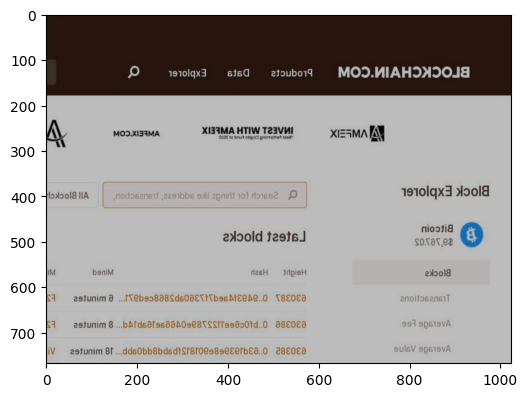

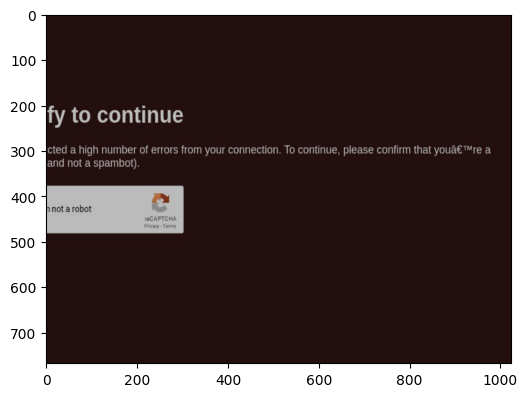

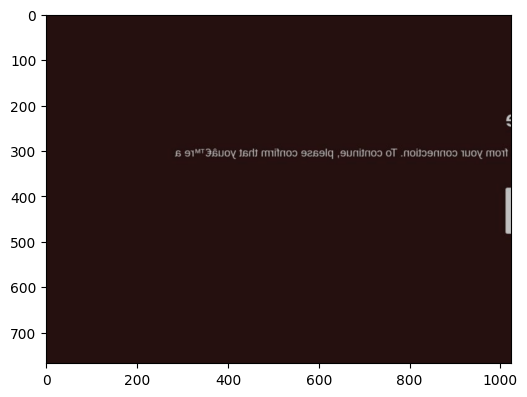

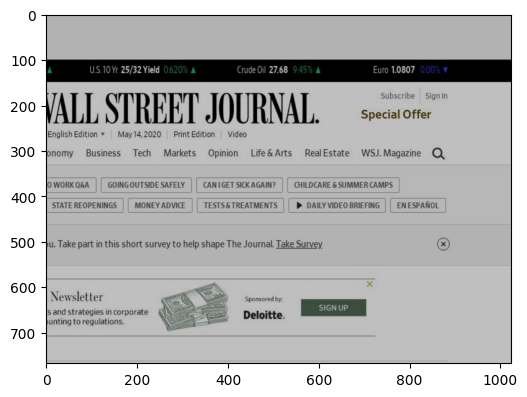

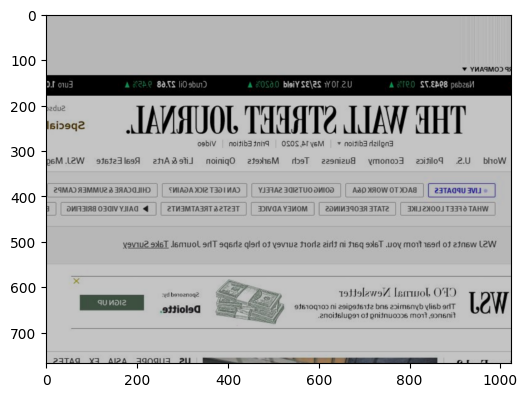

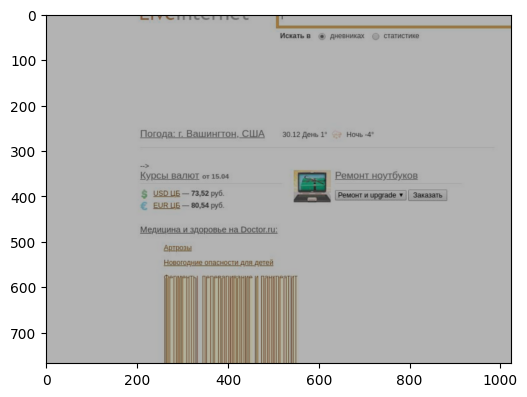

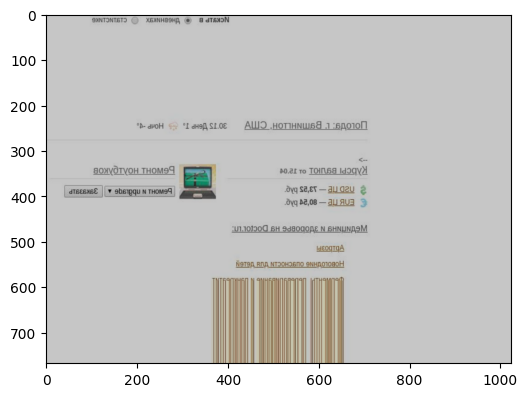

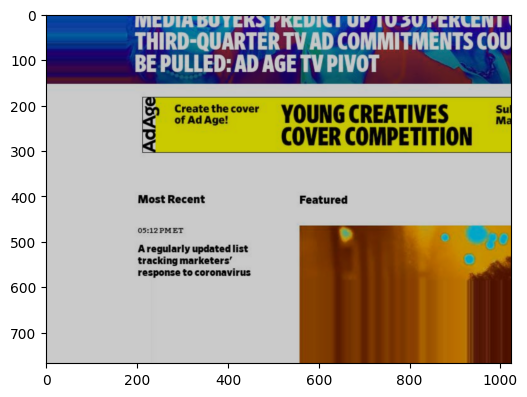

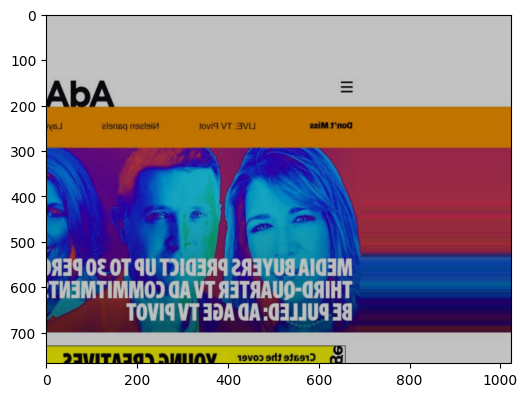

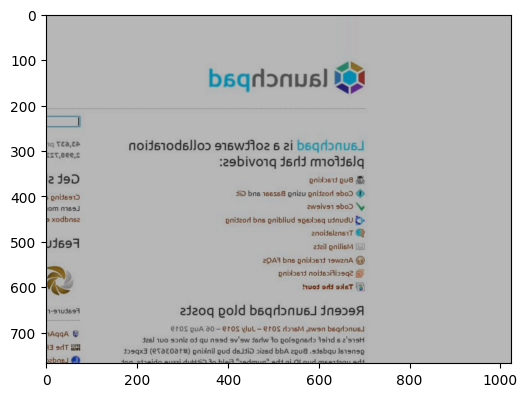

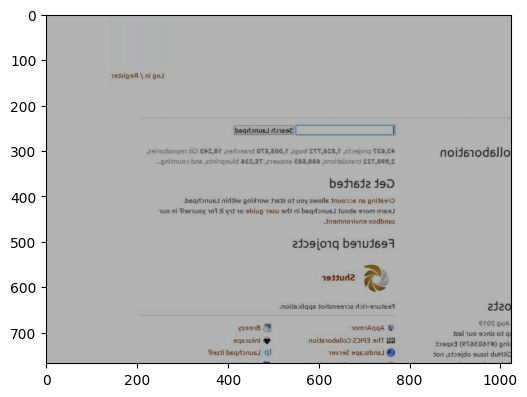

In [ ]:
train_dir = '/content/gdrive/MyDrive/roboflow/train'
valid_dir = '/content/gdrive/MyDrive/roboflow/valid'
test_dir = '/content/gdrive/MyDrive/roboflow/test'

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files
import os

def load_images_from_folder(images):
  imagens = []
  for filename in os.listdir(images):
    img = cv2.imread(os.path.join(images, filename))
    if img is None:
      continue  # Se a imagem não puder ser lida, continua para a próxima iteração
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(
        zoom_range=[0.7,0.8],
        brightness_range=[0.7,0.8],
        height_shift_range=0.5,
        width_shift_range=[-200,200],
        horizontal_flip=True
    )
    it = datagen.flow(samples, batch_size=1)
    imagens.append(img)
    #for i in range(2):
      #plt.figure(figsize=(6, 6))  # Ajusta o tamanho da figura
      #batch = it.next()
      #image = batch[0].astype('uint8')
      #plt.imshow(image)
      #plt.show()

  return imagens

train_dataset = load_images_from_folder(train_dir)

In [ ]:
len(train_dataset)

15

In [ ]:
l

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image_with_boxes(image, boxes, labels):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for box, label in zip(boxes, labels):
        x_center, y_center, width, height = box
        x_min = (x_center - width / 2) * image.shape[1]
        y_min = (y_center - height / 2) * image.shape[0]
        rect = patches.Rectangle((x_min, y_min), width * image.shape[1], height * image.shape[0],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x_min, y_min, str(int(label)), color='red', fontsize=12, verticalalignment='top')

    plt.show()

In [ ]:
def visualize_dataset(dataset, num_samples=5):
    for i in range(num_samples):
        image, boxes, labels = dataset[i]
        image = image.permute(1, 2, 0).cpu().numpy()  # Converte a imagem para o formato HWC
        plot_image_with_boxes(image, boxes, labels)

visualize_dataset(train_dataset)

ValueError: Expected x_min for bbox (-0.07080078125, -0.010416666666666668, 0.10009765625, 0.05208333333333333, 4.0) to be in the range [0.0, 1.0], got -0.07080078125.

In [ ]:
print(len(train_dataset))
print(len(valid_dataset))
print(len(test_dataset))

38
38
37


In [ ]:
!pip install torch --user

In [ ]:
!pip install albumentations --user

In [ ]:
!pip install opencv-python-headless --user

In [ ]:
!cd "gdrive/MyDrive/Colab Notebooks"
%pwd

'/content'

In [ ]:
# prompt: salvar estado atual do notebook junto com os pacotes instalados

!jupyter nbconvert --to html --template lab "gdrive/MyDrive/Colab Notebooks/yolov3-treino1.ipynb"
from google.colab import files
files.download("gdrive/MyDrive/Colab Notebooks/yolov3-treino1.html")
!zip -r yolov3-treino1.zip "gdrive/MyDrive/Colab Notebooks/yolov3-treino1.html"
files.download("yolov3-treino1.zip")
!pip freeze > requirements.txt
!zip -r /content/requirements.zip /content/requirements.txt
files.download("/content/requirements.zip")


[NbConvertApp] Converting notebook gdrive/MyDrive/Colab Notebooks/yolov3-treino1.ipynb to html
[NbConvertApp] Writing 1072774 bytes to gdrive/MyDrive/Colab Notebooks/yolov3-treino1.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

updating: gdrive/MyDrive/Colab Notebooks/yolov3-treino1.html (deflated 84%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

updating: content/requirements.txt (deflated 54%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>